# Project: Wrangling and Analyze Data

## Data Gathering
In the cells below, I gathered **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [ ]:
# import all necessary libraries
import numpy as np
import pandas as pd
import requests 
import seaborn as sns
import matplotlib.pyplot as plt
# import tweepy
# from tweepy import OAuthHandler
import json
%matplotlib inline



1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [ ]:
twitter_archive_enhanced = pd.read_csv('/Users/mac/Downloads/twitter-archive-enhanced (1).csv')
twitter_archive_enhanced.head()

2. Get the Image Predictions file from a URL and write it on a file

In [ ]:
# Get the image_predictions file using http requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Write the response content into a text file 
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [ ]:
image_predictions=pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.sample(10)

3. Get Data from tweets 

### NOTE:This particular page was instrumental in achieving this code below.

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [ ]:
# # 
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_token_secret = ''

# # Authenticate User, Set access Token
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True)

# # Get tweet_ids from df
# tweet_ids = twitter_archive_enhanced.tweet_id.values 
# tweet_ids

##### 3. Get all collect tweet contents using tweet ids

In [ ]:
# all_tweets = []
# all_failed_tweets = []

# for tweet_id in tweet_ids:
    
#     # Exception Handling
#     try:
#         # Use get_status to collect tweets using their IDs
#         # Returns a get_status object
#         tweets = api.get_status(tweet_id)
#         all_tweets.append(tweets)
#         # Catch exceptions
#     except Exception as e:
#         all_failed_tweets.append(e)

# print(all_tweets)
# print(all_failed_tweets)

In [ ]:
# # Create a list to store the Json Object 
    
# my_json_list =[]
 
# # Iterate through the get_status object to isolate the Json        
# for each_tweet in all_tweets:
#     my_json_list.append(each_tweet._json)
    
# # Write and Dump the json object into a txt file

# with open('tweet_json.txt','w') as json_file:
#     json_file.write(json.dumps(my_json_list, indent=4))
    
# # Create a list to store dictionary data      
# my_json_dict = []

# with open('tweet_json.txt', encoding='utf-8') as text_file:
#     my_all_data = json.load(text_file)
    
#     # extract the information from the t
#     for each_dictionary in my_all_data:
#         tweet_id = each_dictionary['id']
#         whole_tweet = each_dictionary['text']
#         only_url = whole_tweet[whole_tweet.find('https'):]
#         favorite_count = each_dictionary['favorite_count']
#         retweet_count = each_dictionary['retweet_count']
#         created_at = each_dictionary['created_at']
#         whole_source = each_dictionary['source']
#         only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
#         source = only_device
#         retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
#         if retweeted_status == 'Original tweet':
#             url = only_url
#         else:
#             retweeted_status = 'This is a retweet'
#             url = 'This is a retweet'
            
#         # append to list to create dataframe     

#         my_json_dict.append({'tweet_id': str(tweet_id),
#                              'favorite_count': int(favorite_count),
#                              'retweet_count': int(retweet_count),
#                              'url': url,
#                              'created_at': created_at,
#                              'source': source,
#                              'retweeted_status': retweeted_status,
#                             })
#         # Create Dataframe
#         tweet_api_df = pd.DataFrame(my_json_dict, columns = ['tweet_id', 'favorite_count', 
#                                                        'retweet_count', 'created_at',
#                                                        'source', 'retweeted_status', 'url'])
    
        

In [ ]:
# tweet_api_df

In [ ]:
# tweet_api_df.to_csv('tweet_api_df',index=False)

In [ ]:
tweet_api_df = pd.read_csv('/Users/mac/Downloads/submit-8b570c2d-6c98-47c8-9c4a-4d0145ee9737/home/tweet_api_df')

## Assessing Data
In this section, I detect and document at least **eight (8) quality issues and two (2) tidiness issue**. I use **both** visual assessment
programmatic assessement to assess the data.




### Virtual Assessment

In [ ]:
twitter_archive_enhanced

In [ ]:
image_predictions

In [ ]:
tweet_api_df

### Programmatic Assessment

#### Twitter Archive

In [ ]:
twitter_archive_enhanced.info()

In [ ]:
twitter_archive_enhanced.describe()

In [ ]:
sum(twitter_archive_enhanced.duplicated())

In [ ]:
twitter_archive_enhanced.isnull().sum()

In [ ]:
twitter_archive_enhanced.rating_denominator.value_counts()

In [ ]:
twitter_archive_enhanced.rating_numerator.value_counts()

In [ ]:
twitter_archive_enhanced.source.value_counts()

#### Image Predictions

In [ ]:
image_predictions.info()

In [ ]:
image_predictions.describe()

In [ ]:
sum(image_predictions.duplicated())

In [ ]:
image_predictions.isnull().sum()

In [ ]:
image_predictions.p1_dog.value_counts()

In [ ]:
image_predictions.p2_dog.value_counts()

In [ ]:
image_predictions.p3_dog.value_counts()

#### Twitter API

In [ ]:
tweet_api_df.info()

In [ ]:
tweet_api_df.describe()

In [ ]:
sum(tweet_api_df.duplicated())

In [ ]:
tweet_api_df.isnull().sum()

### Quality issues

twitter_archive_df

1. Rating Numerator and Ratings Denominator contain wrong Values

2. timestamp column is a string 

3. retweets are present in dataset 

4. name column is in different case, contains impossible Values


image_predictions_df

5. Column Names are not decriptive enough

6. p1 and p2 are in different cases


tweet_api_df

7. Delete Retweets

8. created_at is a string

### Tidiness issues
twitter_archive_df

1. Four Columns should be a single column

2. tweet_id column not consistent in the three tables

## Cleaning Data
In this section, I clean **all** of the issues I documented while assessing. 

**Note:** I copied the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Make copies of original pieces of data

twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

image_predictions_clean = image_predictions.copy()

tweet_api_df_clean = tweet_api_df.copy()


### Quality

##### Issue #1: Rating Numerator and Ratings Denominator contain wrong Values

#### Define: Treat both columns

#### Code

In [ ]:
# Start with Ratings Denominator

twitter_archive_enhanced_clean.rating_denominator.value_counts()

Rating denominator should have a constant value, we will further investigate all the rows with numbers other than 10 as denominator

In [ ]:
# Get all dataset without 10 as denominator
wrong_values = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_denominator']!= 10]

wrong_values


In [ ]:
# Investigate the dataset further to understand why the ratings were incorrectly extracted
import re

counter = 0
for i in wrong_values.text:
    counter += 1
    print(f'{counter}. This is text: {i}')
    print()
    new_extract = re.findall(r'\d*\.?\d+\/\d{2}', i)
    print(f'{counter}.This is the rating extracted:', new_extract)
    print()
   



Assessing the data in the text editor I can see all the 23 incorrectly extracted ratings and I will make the all the necessary adjustments. 

Due to the volume, I can further assess these datasets using their pictures to arrive at the correct ratings 

For those without double ratings, further Investigation will be done to ascertain the ratings, however, if nothing, it will be replace with 0

In [ ]:
# Albanian 3 1/2 legged  Episcopalian

twitter_archive_enhanced_clean.iloc[2335, 10] = 9
twitter_archive_enhanced_clean.iloc[2335, 11] = 10

# entire platoon of puppers. Total score: 88/80 
# There are 8 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1843, 10] = 11
twitter_archive_enhanced_clean.iloc[1843, 11] = 10

# IT'S PUPPERGEDDON. Total of 144/120 ...I think
# There are 12 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1779, 10] = 12
twitter_archive_enhanced_clean.iloc[1779, 11] = 10


# This is Darrel. He just robbed a 7/11, ratings=10/10

twitter_archive_enhanced_clean.iloc[1662, 10] = 10
twitter_archive_enhanced_clean.iloc[1662, 11] = 10

In [ ]:
#Clever puppers 121/110
# There are 12 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1635, 10] = 11
twitter_archive_enhanced_clean.iloc[1635, 11] = 10

# Two sneaky puppers were not initially seen, moving the rating to 143/130. 

twitter_archive_enhanced_clean.iloc[1635, 10] = 13
twitter_archive_enhanced_clean.iloc[1635, 11] = 10

# The tweet below is a reply to the one above


twitter_archive_enhanced_clean.iloc[1634, 10] = 0
twitter_archive_enhanced_clean.iloc[1634, 11] = 0

In [ ]:
# here's a bucket of pups. 44/40 would pet all at once
# There are 4 puppers in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1433, 10] = 11
twitter_archive_enhanced_clean.iloc[1433, 11] = 10

# Here is a whole flock of puppers.  60/50 I'll take the lot
# There are 5 dogs in the picture, 12/10

twitter_archive_enhanced_clean.iloc[1351, 10] = 12
twitter_archive_enhanced_clean.iloc[1351, 11] = 10


# None know where camera is. 45/50 would hug all at once
# There are 5 dogs in the picture, 9/10

twitter_archive_enhanced_clean.iloc[1274, 10] = 9
twitter_archive_enhanced_clean.iloc[1274, 11] = 10

# brigade of puppers. All look very prepared for whatever happens next. 80/80
# There are 8 dogs in the picture, 10/10

twitter_archive_enhanced_clean.iloc[1254, 10] = 10
twitter_archive_enhanced_clean.iloc[1254, 11] = 10

# Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody
# There are 9 dogs in the picture, 11/10

twitter_archive_enhanced_clean.iloc[1228, 10] = 11
twitter_archive_enhanced_clean.iloc[1228, 11] = 10

# This is Bluebert.
# Amazed af. 11/10

twitter_archive_enhanced_clean.iloc[1202, 10] = 11
twitter_archive_enhanced_clean.iloc[1202, 11] = 10


# Happy 4/20 from the squad! 13/10 for all

twitter_archive_enhanced_clean.iloc[1165, 10] = 13
twitter_archive_enhanced_clean.iloc[1165, 11] = 10

# well behaved squad of doggos. 204/170 would try to pet all at once
# There are 17 doggos in the picture, 12/10

twitter_archive_enhanced_clean.iloc[1120, 10] = 12
twitter_archive_enhanced_clean.iloc[1120, 11] = 10

# this is Bretagne.
# last surviving 9/11 search dog, and our second ever 14/10. 

twitter_archive_enhanced_clean.iloc[1068, 10] = 14
twitter_archive_enhanced_clean.iloc[1068, 11] = 10

# Why does this never happen at my front door... 165/150 
# There are 15 dogs in the picture, 11/10

twitter_archive_enhanced_clean.iloc[902, 10] = 11
twitter_archive_enhanced_clean.iloc[902, 11] = 10

# the floofs have been released. 84/70
# There are 7 dogs in the picture, 12/10

twitter_archive_enhanced_clean.iloc[433, 10] = 12
twitter_archive_enhanced_clean.iloc[433, 11] = 10


# but 960/00 isn't a valid rating, 13/10 is tho

twitter_archive_enhanced_clean.iloc[313, 10] = 13
twitter_archive_enhanced_clean.iloc[313, 11] = 10





In [ ]:

# account started on 11/15/15
twitter_archive_enhanced_clean.iloc[342, 10] = 0
twitter_archive_enhanced_clean.iloc[342, 11] = 0

# Meet Sam. She smiles 24/7 
twitter_archive_enhanced_clean.iloc[516, 10] = 0
twitter_archive_enhanced_clean.iloc[516, 11] = 0

# Yes I do realize a rating of 4/20
twitter_archive_enhanced_clean.iloc[1598, 10] = 0
twitter_archive_enhanced_clean.iloc[1598, 11] = 0

# Yes I do realize a rating of 4/20
twitter_archive_enhanced_clean.iloc[1663, 10] = 0
twitter_archive_enhanced_clean.iloc[1663, 11] = 0




I realized that some rating_numerators are actually in fractions and are incorrectly extracted

In [ ]:

# Get all the fraction values
fraction_values = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]


In [ ]:
# Get an overview of the fraction values

for i in fraction_values['text']:
    print()
    print(i)

In [ ]:

# Treat fraction values 
twitter_archive_enhanced_clean.iloc[45, 5] = 13.5
twitter_archive_enhanced_clean.iloc[340, 5] = 9.75
twitter_archive_enhanced_clean.iloc[695, 5] = 9.75
twitter_archive_enhanced_clean.iloc[763, 5] = 11.27
twitter_archive_enhanced_clean.iloc[1689, 5] = 9.5
twitter_archive_enhanced_clean.iloc[1712, 5] = 11.26

#### Test

In [ ]:
twitter_archive_enhanced_clean.rating_denominator.value_counts(normalize=True)

In [ ]:
twitter_archive_enhanced_clean.query('rating_denominator==11')

##### Issue #2: timestamp is a string

#### Define: Convert timestamp column from a string to datetime

#### Code

In [ ]:
# Convert to datetime
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

#### Test

In [ ]:
# Check for Datatype
twitter_archive_enhanced_clean.dtypes

#### Issue #3:  retweets are present in dataset 

#### Define: Drop Retweets

#### Code

In [ ]:
# Check for retweeted_status
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()]

In [ ]:
# Drop  Retweets
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()].index, inplace=True, axis=0)

#### Test

In [ ]:
# Check for retweeted_status
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.notnull()]

#### Issue #4:  name column is in different case and contains impossible Values

#### Define: Treat Name column


- Remove Impossible values and capitalize

#### Code


In [ ]:
# Get a view of all the names in lower case
impossible_names = twitter_archive_enhanced_clean.name.str.contains(r'^[a-z]')

# impossible_names['name'].sample(20)
twitter_archive_enhanced_clean[impossible_names].name.head(20)


In [ ]:
twitter_archive_enhanced_clean.loc[impossible_names,'name'] = 'nil'

In [ ]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean.name.str.capitalize()

#### Test

In [ ]:



# Check for values in lower case

twitter_archive_enhanced_clean.name.str.islower().sum()

#### Issue #5: column names are not descriptive enough

#### Define: Rename Columns 

#### Code

In [ ]:
image_predictions_clean.columns = ('tweet_id','jpg_url',	'img_num'	,'prediction_1',
'prediction_1_con',
'prediction_1_breed',

'prediction_2',
'prediction_2_con',
'prediction_2_breed',
'prediction_3',
'prediction_3_con',
'prediction_3_breed')

#### Test

In [ ]:
image_predictions_clean.info()

#### Issue #6: prediction 1 - 3 not in the same case

#### Define: Capitalize the columns

#### Code

In [ ]:
# Check for lower case
print(image_predictions_clean.prediction_3.str.islower().sum())
print(image_predictions_clean.prediction_2.str.islower().sum())
print(image_predictions_clean.prediction_1.str.islower().sum())

In [ ]:
# Treat the three prediction column
image_predictions_clean['prediction_1']= image_predictions_clean.prediction_1.str.capitalize()
image_predictions_clean['prediction_2'] = image_predictions_clean.prediction_2.str.capitalize()
image_predictions_clean['prediction_3'] = image_predictions_clean.prediction_3.str.capitalize()

#### Test

In [ ]:
image_predictions_clean.prediction_1.str.islower().sum()

#### Issue #7: created_at is a string

#### Define: Treat created_at column

#### Code

In [ ]:
# Check the datatype
tweet_api_df_clean.created_at.dtypes

In [ ]:
# Convert to datetime
tweet_api_df_clean['created_at'] = pd.to_datetime(tweet_api_df_clean['created_at'])

#### Test

In [ ]:
tweet_api_df_clean.info()

#### Issue #8: retweets are present in dataset

#### Define: Delete Retweets in Dataset

#### Code

In [ ]:
# Check for the status
tweet_api_df_clean.retweeted_status.value_counts()

In [ ]:
# Drop Retweets

retweets = tweet_api_df_clean[tweet_api_df_clean['retweeted_status']== 'This is a retweet']
tweet_api_df_clean.drop(retweets.index, inplace=True, axis=0)



#### Test

In [ ]:
# Confirm only one unique value 'Original Tweet'
tweet_api_df_clean.retweeted_status.unique()

### Tidiness

#### Issue #1: tweet_id should be of the same datatype in each table

#### Define: In tweet_api_df_clean,  Convert tweet_id to numeric to match

#### Code

In [ ]:
# Check dtypes
tweet_api_df_clean.dtypes

In [ ]:
# Convert to Numeric

tweet_api_df_clean['tweet_id']= pd.to_numeric(tweet_api_df_clean['tweet_id'])

###### Test

In [ ]:
tweet_api_df_clean.info()

#### Issue #2: Four Values are Variables (Columns)

#### Define: Concat the columns 

#### Code

In [ ]:
# Get the stage  
stage = ['doggo', 'floofer', 'pupper', 'puppo']

# Replace None with '' for concat
for i in stage:
    twitter_archive_enhanced_clean[i]=twitter_archive_enhanced_clean[i].replace("None", "")




In [ ]:
# combine all the columns
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean.doggo.str.cat(twitter_archive_enhanced_clean.floofer)
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].str.cat(twitter_archive_enhanced_clean.pupper).str.cat(twitter_archive_enhanced_clean.puppo)



In [ ]:
# drop the four 
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)



In [ ]:
# fill with nan for empty cells
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].replace('', np.nan)

In [ ]:
# Define a function to replace with 'multiple'

def get_multiple(stage):
    if stage in ['doggopupper', 'doggopuppo', 'doggofloofer']:
        stage = 'multiple'
    else:
        pass
    return stage


In [ ]:
twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].map(get_multiple)

#### Test

In [ ]:
twitter_archive_enhanced_clean.stage.value_counts()

### Merge Datasets

In [ ]:
# Merge Datasets 

twitter_archive_master = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean, how='left', on='tweet_id')

In [ ]:
#Drop rows without picture (jpg_url)
twitter_archive_master = twitter_archive_master[twitter_archive_master['jpg_url'].notnull()]

In [ ]:
# Merge datasets

twitter_archive_master = pd.merge(twitter_archive_master, tweet_api_df_clean, how='left', on='tweet_id')



## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
#Store the clean DataFrame in a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, I analyze and visualize the wrangled data. I produce at least **three (3) insights and one (1) visualization.**

### Most Prominent Dog Stage

<AxesSubplot:>

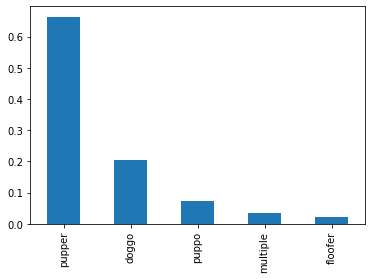

In [140]:
# Get the most prominent Dog Stage
twitter_archive_master.stage.value_counts(normalize=True).plot(kind='bar')

The above chart shows the volume of content per dog stage. It is quite evident that the most prominent dog stage is the pupper, represented over 60% of the values. 

Multiple dog stages have the second least number. In the second part of this notebook, I will investigate the level of engagements derived from each dog stage. 

### Most Prominent Dog Breeds 

In [ ]:
# Get the most prominent dog breeds
twitter_archive_master.groupby('prediction_1')['tweet_id'].count().sort_values(ascending=False).head(10)

In [115]:
# Filter for true dog breed 

true_dog_breed = twitter_archive_master[twitter_archive_master['prediction_1_breed']==True]

# Find top ten dog breed 
true_dog_breed.groupby('prediction_1')['tweet_id'].count().sort_values(ascending=False).head(10)


prediction_1
Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Toy_poodle             38
Pomeranian             38
Malamute               29
Name: tweet_id, dtype: int64

### Most Prominent Source

In [116]:
twitter_archive_master.source_y.value_counts(normalize=True)

Twitter for iPhone    0.980856
Twitter Web Client    0.014106
TweetDeck             0.005038
Name: source_y, dtype: float64

### Insights:
1. I was able to identify the most prominent dog breeds

2. I was able to identify the most prominent dog stage


3.  I was able to identify the most prominent source(aP)


/var/folders/w1/28w4z0fn4gg91y3ckzl9jwk00000gn/T/ipykernel_20224/3886551775.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparemt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('test.png',dpi=300, transparemt=True)


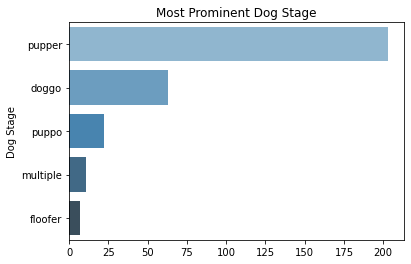

In [121]:
# Create a visualization

x=twitter_archive_master.stage.value_counts().index
y=twitter_archive_master.stage.value_counts().values

sns.barplot(x=y,y=x,palette="Blues_d")
plt.ylabel('Dog Stage')
plt.title('Most Prominent Dog Stage')
plt.savefig('test.png',dpi=300, transparemt=True)


## PART 2

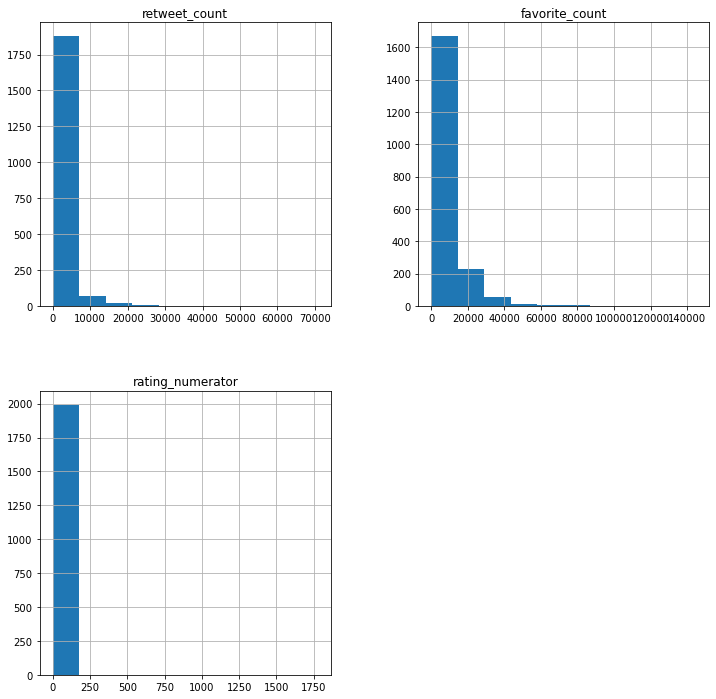

In [136]:
#Discover numerical columns in easier way
df_numeric = twitter_archive_master[['retweet_count', 'favorite_count', 'rating_numerator']]
df_numeric.hist(figsize = (12,12));

I will investigate the level of engagements derived from each dog stage. 

In [141]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num',
       'prediction_1', 'prediction_1_con', 'prediction_1_breed',
       'prediction_2', 'prediction_2_con', 'prediction_2_breed',
       'prediction_3', 'prediction_3_con', 'prediction_3_breed',
       'favorite_count', 'retweet_count', 'created_at', 'source_y',
       'retweeted_status', 'url'],
      dtype='object')

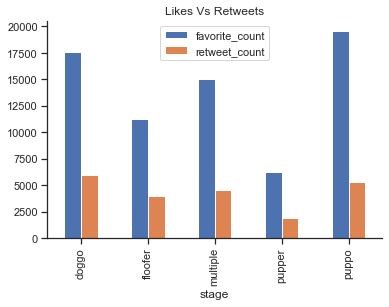

In [148]:
twitter_archive_master.groupby('stage')[['favorite_count', 'retweet_count']].mean().plot(kind='bar')


plt.title('Likes Vs Retweets')
plt.legend()
plt.show()

Further investigation shows the level of engagement from each dog stage. Pupper has the most tweet counts but in terms of engagements (likes and retweets) it is the least.